# <center> Loan Approval Predictions

## Dataset Information :-

>* Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. 
>*These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.
>* This is a standard supervised classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.

>**Feature Information**	

Variable | Description
----------|--------------
Loan_ID | Unique Loan ID
Gender | Male/ Female
Married | Applicant married (Y/N)
Dependents | Number of dependents
Education |          Applicant Education (Graduate/ Under Graduate)
Self_Employed | Self employed (Y/N)
ApplicantIncome | Applicant income
CoapplicantIncome | Coapplicant income
LoanAmount | Loan amount in thousands
Loan_Amount_Term | Term of loan in months
Credit_History | credit history meets guidelines
Property_Area | Urban/ Semi Urban/ Rural
Loan_Status | Loan approved (Y/N)

In [1]:
# import required libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from yellowbrick.classifier import classification_report, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load the data


In [3]:
dataset = pd.read_csv("loan_prediction_dataset.csv")
dataset.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

# EDA ( Exploratory Data Analysis )

In [4]:
dataset.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
dataset.shape

(614, 13)

In [7]:
dataset.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

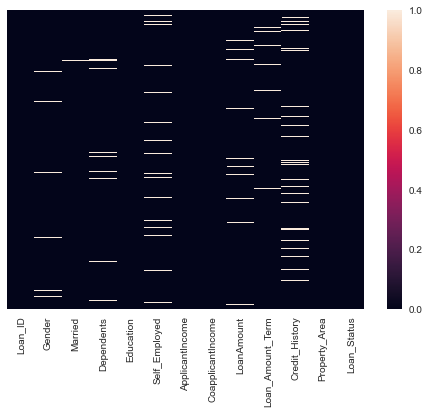

In [8]:
# Visusalize null values
sns.heatmap(dataset.isnull(), yticklabels=False);

In [9]:
# Check target variable data distribution

dataset.Loan_Status.unique(), dataset.Loan_Status.value_counts()

(array(['Y', 'N'], dtype=object),
 Y    422
 N    192
 Name: Loan_Status, dtype: int64)

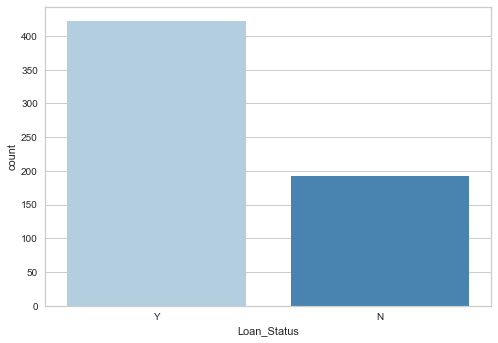

In [10]:
sns.countplot(x='Loan_Status', data=dataset, palette='Blues');

In [11]:
# Checking each column's data

len(dataset.Loan_ID.unique())

614

**NOTE:** Each applicant has different Load_Id, so it won't be useful in predictions.

**Categorical Features**

In [12]:
dataset.Gender.unique(), dataset.Gender.value_counts()

(array(['Male', 'Female', nan], dtype=object),
 Male      489
 Female    112
 Name: Gender, dtype: int64)

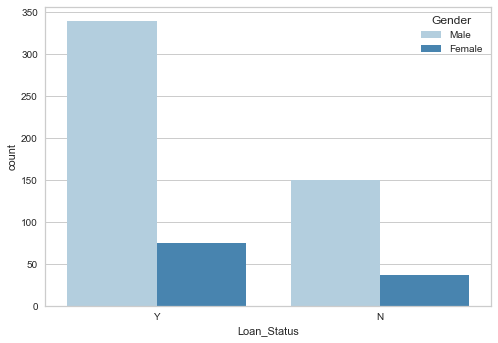

In [13]:
sns.countplot(x='Loan_Status', hue= 'Gender', data=dataset, palette='Blues');

In [14]:
dataset.Married.unique(), dataset.Married.value_counts()

(array(['No', 'Yes', nan], dtype=object),
 Yes    398
 No     213
 Name: Married, dtype: int64)

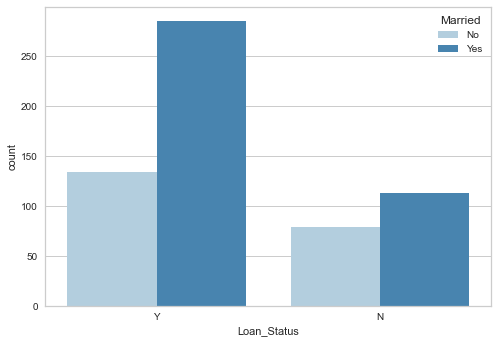

In [15]:
sns.countplot(x='Loan_Status', hue= 'Married', data=dataset, palette='Blues');

In [16]:
dataset.Dependents.unique(), dataset.Dependents.value_counts()

(array(['0', '1', '2', '3+', nan], dtype=object),
 0     345
 1     102
 2     101
 3+     51
 Name: Dependents, dtype: int64)

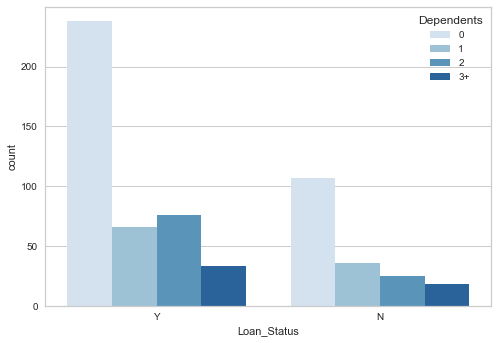

In [17]:
sns.countplot(x='Loan_Status', hue= 'Dependents', data=dataset, palette='Blues');

In [18]:
dataset.Education.unique(), dataset.Education.value_counts()

(array(['Graduate', 'Not Graduate'], dtype=object),
 Graduate        480
 Not Graduate    134
 Name: Education, dtype: int64)

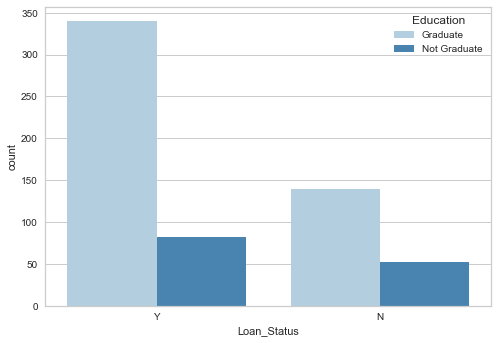

In [19]:
sns.countplot(x='Loan_Status', hue= 'Education', data=dataset, palette='Blues');

In [20]:
dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [21]:
dataset.Self_Employed.unique(), dataset.Self_Employed.value_counts()

(array(['No', 'Yes', nan], dtype=object),
 No     500
 Yes     82
 Name: Self_Employed, dtype: int64)

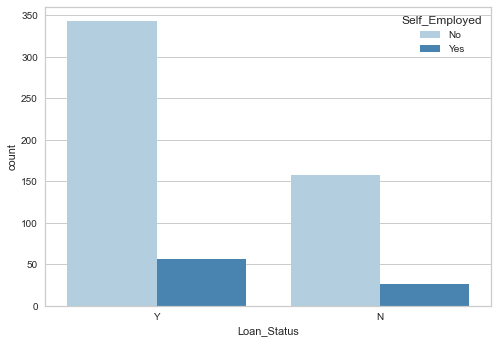

In [22]:
sns.countplot(x='Loan_Status', hue= 'Self_Employed' , data=dataset, palette='Blues');

In [23]:
dataset.Property_Area.unique(), dataset.Property_Area.value_counts()

(array(['Urban', 'Rural', 'Semiurban'], dtype=object),
 Semiurban    233
 Urban        202
 Rural        179
 Name: Property_Area, dtype: int64)

**NOTE :**
* We have some categorical features like Gender, Married, Dependents, Self Employed which have some missing values which we have to fill.

**Numerical Features**

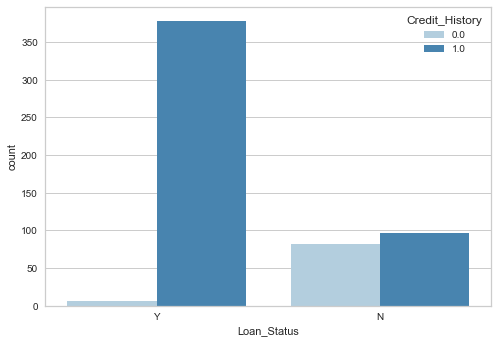

In [24]:
sns.countplot(x='Loan_Status', hue= 'Credit_History' , data=dataset, palette='Blues');

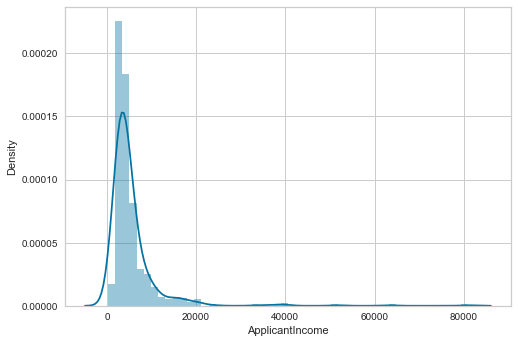

In [25]:
sns.distplot(dataset.ApplicantIncome);

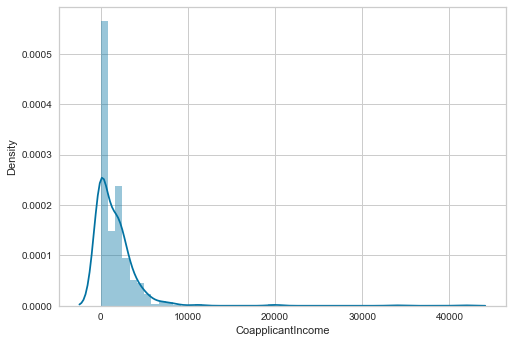

In [26]:
sns.distplot(dataset.CoapplicantIncome);

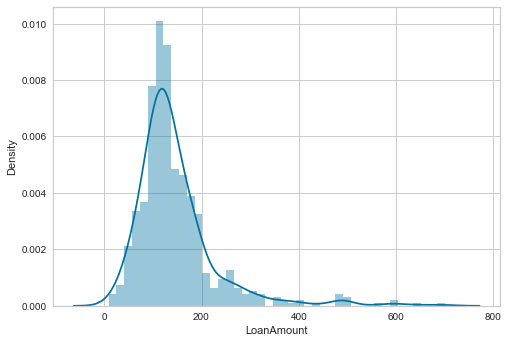

In [27]:
sns.distplot(dataset.LoanAmount);

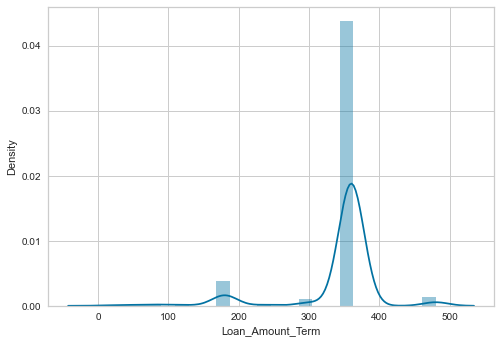

In [28]:
sns.distplot(dataset.Loan_Amount_Term);

In [29]:
dataset.Credit_History.unique(), dataset.Credit_History.value_counts()

(array([ 1.,  0., nan]),
 1.0    475
 0.0     89
 Name: Credit_History, dtype: int64)

**NOTE :** 
   * We have some numerical columns like Applicant income, Coapplicant income, Loan amount which have Right skewed data. So we will minimize skewness and make distribution as normal as possible by applying log function to it.

**NOTE :** We will make a copy of dataset to do preprocessing.

In [30]:
temp_data = dataset.copy()

In [31]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [32]:
for col in cols:
    temp_data[col + '_log'] = np.log(temp_data[col] + 1)

In [33]:
temp_data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  ApplicantIncome_log  \
0             1.0         Urban           Y             8.674197   
1             1.0         Rural           N             8.430327   
2             1.0         Urban           Y             8.006701   
3             1.0         Urban           Y             7.857094   
4             1.0         Urban           Y             8.699681   

   CoapplicantIncome_log  LoanAmount_log  Loan_Amount_Term_log  
0               0.000000             NaN              5.888878  
1               7.319202        4.859812              5.888878  
2               0.000000        4.204693              5.888878  
3               7.765993        4.795791              5.888878  
4               0.000000        4.955827              5.888878

In [34]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                614 non-null    object 
 1   Gender                 601 non-null    object 
 2   Married                611 non-null    object 
 3   Dependents             599 non-null    object 
 4   Education              614 non-null    object 
 5   Self_Employed          582 non-null    object 
 6   ApplicantIncome        614 non-null    int64  
 7   CoapplicantIncome      614 non-null    float64
 8   LoanAmount             592 non-null    float64
 9   Loan_Amount_Term       600 non-null    float64
 10  Credit_History         564 non-null    float64
 11  Property_Area          614 non-null    object 
 12  Loan_Status            614 non-null    object 
 13  ApplicantIncome_log    614 non-null    float64
 14  CoapplicantIncome_log  614 non-null    float64
 15  LoanAm

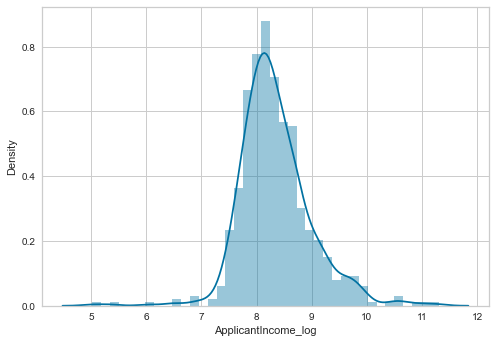

In [35]:
sns.distplot(temp_data.ApplicantIncome_log);

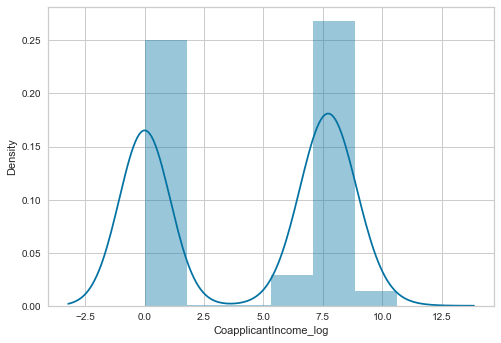

In [36]:
sns.distplot(temp_data.CoapplicantIncome_log);

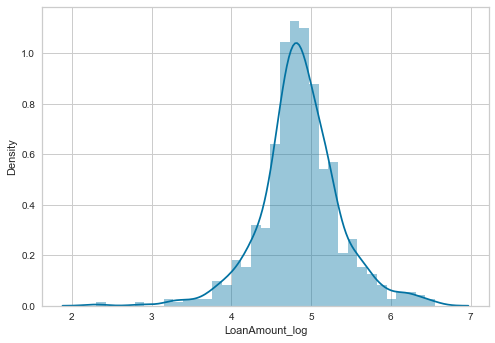

In [37]:
sns.distplot(temp_data.LoanAmount_log);

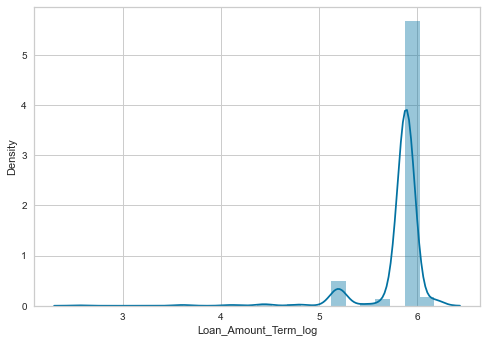

In [38]:
sns.distplot(temp_data.Loan_Amount_Term_log);

**NOTE :** We can see changes in data distribution from skewed to almost normal distribution

In [39]:
# Now we will drop unneccessary columns from data

temp_data = temp_data.drop(columns= ['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
temp_data.head()

Gender Married Dependents     Education Self_Employed  Credit_History  \
0   Male      No          0      Graduate            No             1.0   
1   Male     Yes          1      Graduate            No             1.0   
2   Male     Yes          0      Graduate           Yes             1.0   
3   Male     Yes          0  Not Graduate            No             1.0   
4   Male      No          0      Graduate            No             1.0   

  Property_Area Loan_Status  ApplicantIncome_log  CoapplicantIncome_log  \
0         Urban           Y             8.674197               0.000000   
1         Rural           N             8.430327               7.319202   
2         Urban           Y             8.006701               0.000000   
3         Urban           Y             7.857094               7.765993   
4         Urban           Y             8.699681               0.000000   

   LoanAmount_log  Loan_Amount_Term_log  
0             NaN              5.888878  
1        4.859812              5.888878  
2        4.204693              5.888878  
3        4.795791              5.888878  
4        4.955827              5.888878

In [40]:
# Now we will convert categorical features into numerical format by using Label Encoder.

cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [41]:
le = LabelEncoder()
for col in cols:
    temp_data[col] = le.fit_transform(temp_data[col])

In [42]:
temp_data.head()

Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0       1        0           0          0              0             1.0   
1       1        1           1          0              0             1.0   
2       1        1           0          0              1             1.0   
3       1        1           0          1              0             1.0   
4       1        0           0          0              0             1.0   

   Property_Area  Loan_Status  ApplicantIncome_log  CoapplicantIncome_log  \
0              2            1             8.674197               0.000000   
1              0            0             8.430327               7.319202   
2              2            1             8.006701               0.000000   
3              2            1             7.857094               7.765993   
4              2            1             8.699681               0.000000   

   LoanAmount_log  Loan_Amount_Term_log  
0             NaN              5.888878  
1        4.859812              5.888878  
2        4.204693              5.888878  
3        4.795791              5.888878  
4        4.955827              5.888878

In [43]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 614 non-null    int32  
 1   Married                614 non-null    int32  
 2   Dependents             614 non-null    int32  
 3   Education              614 non-null    int32  
 4   Self_Employed          614 non-null    int32  
 5   Credit_History         564 non-null    float64
 6   Property_Area          614 non-null    int32  
 7   Loan_Status            614 non-null    int32  
 8   ApplicantIncome_log    614 non-null    float64
 9   CoapplicantIncome_log  614 non-null    float64
 10  LoanAmount_log         592 non-null    float64
 11  Loan_Amount_Term_log   600 non-null    float64
dtypes: float64(5), int32(7)
memory usage: 40.9 KB


In [44]:
temp_data.isna().sum()

Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
Credit_History           50
Property_Area             0
Loan_Status               0
ApplicantIncome_log       0
CoapplicantIncome_log     0
LoanAmount_log           22
Loan_Amount_Term_log     14
dtype: int64

In [45]:
# fill the missing values for numerical features with mean
temp_data['LoanAmount_log'] = temp_data['LoanAmount_log'].fillna(temp_data['LoanAmount_log'].mean())
temp_data['Loan_Amount_Term_log'] = temp_data['Loan_Amount_Term_log'].fillna(temp_data['Loan_Amount_Term_log'].mean())

In [46]:
temp_data.isna().sum()

Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
Credit_History           50
Property_Area             0
Loan_Status               0
ApplicantIncome_log       0
CoapplicantIncome_log     0
LoanAmount_log            0
Loan_Amount_Term_log      0
dtype: int64

In [47]:
temp_data.Credit_History.unique(), temp_data.Credit_History.value_counts()

(array([ 1.,  0., nan]),
 1.0    475
 0.0     89
 Name: Credit_History, dtype: int64)

**NOTE :** We have Credit History column whose values are 0 and 1. so it won't be right if we fill missing values with mean. Therefore we will use mode here.

In [48]:
temp_data['Credit_History'] = temp_data['Credit_History'].fillna(temp_data['Credit_History'].mode()[0])

In [49]:
temp_data.isna().sum()

Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
Credit_History           0
Property_Area            0
Loan_Status              0
ApplicantIncome_log      0
CoapplicantIncome_log    0
LoanAmount_log           0
Loan_Amount_Term_log     0
dtype: int64

## Correlation Matrix

<AxesSubplot:>

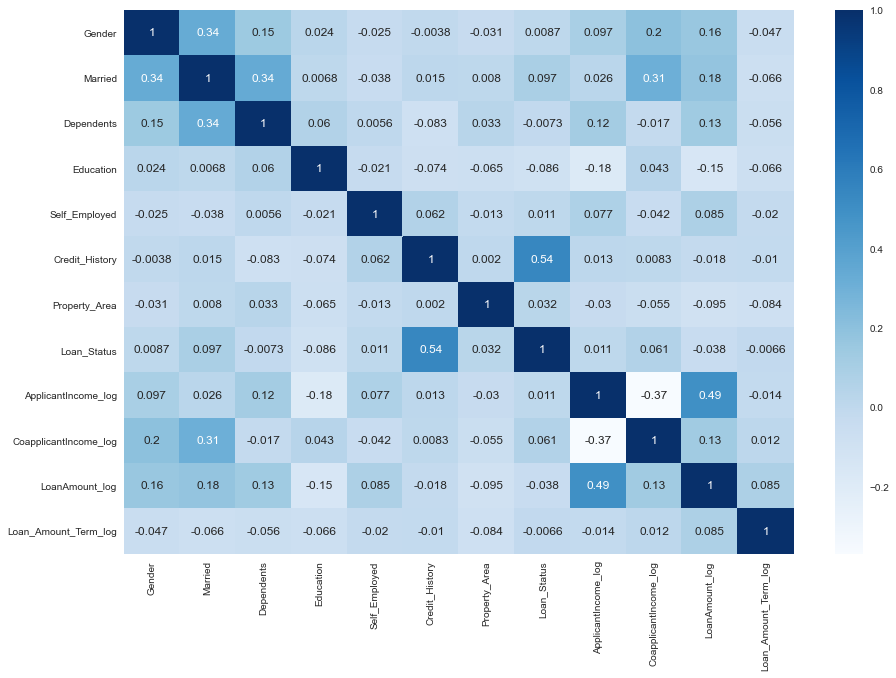

In [50]:
corr = temp_data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="Blues")

**NOTE :** As we can see in the correlation matrix, there are no features which are highly correlated.

In [51]:
# save processed data in new csv file

temp_data.to_csv('processed_data.csv', index= False)

In [52]:
processed_data = pd.read_csv('processed_data.csv')
processed_data.head()

Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0       1        0           0          0              0             1.0   
1       1        1           1          0              0             1.0   
2       1        1           0          0              1             1.0   
3       1        1           0          1              0             1.0   
4       1        0           0          0              0             1.0   

   Property_Area  Loan_Status  ApplicantIncome_log  CoapplicantIncome_log  \
0              2            1             8.674197               0.000000   
1              0            0             8.430327               7.319202   
2              2            1             8.006701               0.000000   
3              2            1             7.857094               7.765993   
4              2            1             8.699681               0.000000   

   LoanAmount_log  Loan_Amount_Term_log  
0        4.866325              5.888878  
1        4.859812              5.888878  
2        4.204693              5.888878  
3        4.795791              5.888878  
4        4.955827              5.888878

## Split the data into Train and Test set

In [53]:
X = processed_data.drop(columns='Loan_Status', axis=1)
y = processed_data['Loan_Status']
X.shape, y.shape

((614, 11), (614,))

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((460, 11), (154, 11), (460,), (154,))

In [56]:
# Create a function to fit the model and display evalutions.

def fit_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    print(f'Accuracy of {model} is {model.score(X_test, y_test)*100}.')
    print(f'Confusion Matrix of {model}: {confusion_matrix(model, X_train, y_train, X_test, y_test)}')
    y_preds = model.predict(X_test)
    print(f'Recall score for {model} is {recall_score(y_test,y_preds)}')
    print(f'Precision score for {model} is {precision_score(y_test,y_preds)}')
    print(f'F1 score for {model} is {f1_score(y_test,y_preds)}')
    print(f'F0.5 score for {model} is {fbeta_score(y_test,y_preds, beta=0.5)}')

Now we will try different models and evaluate them.

In [57]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

Accuracy of RandomForestClassifier(random_state=0) is 77.92207792207793.


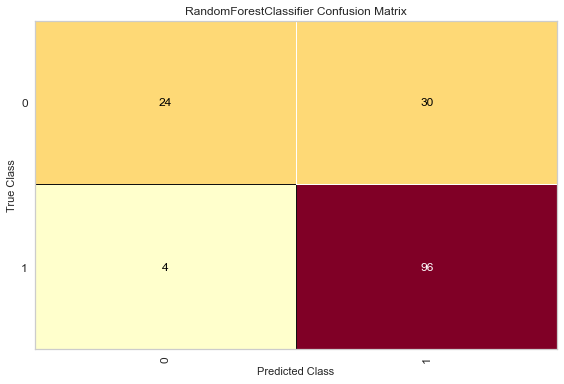

Confusion Matrix of RandomForestClassifier(random_state=0): ConfusionMatrix(ax=<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x000002BB16DF07F0>,
                estimator=RandomForestClassifier(random_state=0))
Recall score for RandomForestClassifier(random_state=0) is 0.96
Precision score for RandomForestClassifier(random_state=0) is 0.7619047619047619
F1 score for RandomForestClassifier(random_state=0) is 0.8495575221238937
F0.5 score for RandomForestClassifier(random_state=0) is 0.7947019867549668


In [58]:
# 1. Random Forest Classifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
fit_and_evaluate_model(rf, X_train, X_test, y_train, y_test)

Accuracy of KNeighborsClassifier() is 69.48051948051948.


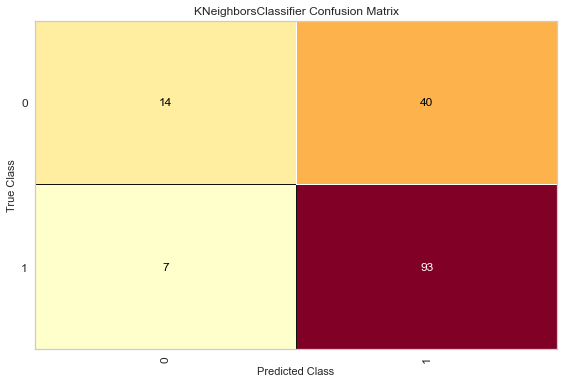

Confusion Matrix of KNeighborsClassifier(): ConfusionMatrix(ax=<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x000002BB16E6BB50>,
                estimator=KNeighborsClassifier())
Recall score for KNeighborsClassifier() is 0.93
Precision score for KNeighborsClassifier() is 0.6992481203007519
F1 score for KNeighborsClassifier() is 0.798283261802575
F0.5 score for KNeighborsClassifier() is 0.7357594936708861


In [59]:
# 2. KNearest Neighbors Classifier

knn = KNeighborsClassifier()
fit_and_evaluate_model(knn,  X_train, X_test, y_train, y_test)

Accuracy of DecisionTreeClassifier(random_state=0) is 69.48051948051948.


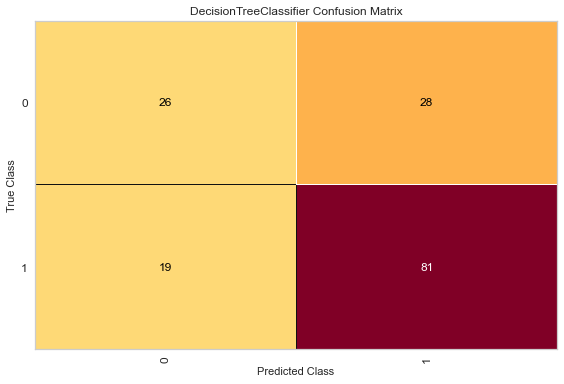

Confusion Matrix of DecisionTreeClassifier(random_state=0): ConfusionMatrix(ax=<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x000002BB164D29D0>,
                estimator=DecisionTreeClassifier(random_state=0))
Recall score for DecisionTreeClassifier(random_state=0) is 0.81
Precision score for DecisionTreeClassifier(random_state=0) is 0.7431192660550459
F1 score for DecisionTreeClassifier(random_state=0) is 0.7751196172248804
F0.5 score for DecisionTreeClassifier(random_state=0) is 0.7555970149253731


In [60]:
# 3. Decision Tree Classifier

dt = DecisionTreeClassifier(random_state=0)
fit_and_evaluate_model(dt,  X_train, X_test, y_train, y_test)

Accuracy of LogisticRegression(random_state=0) is 77.27272727272727.


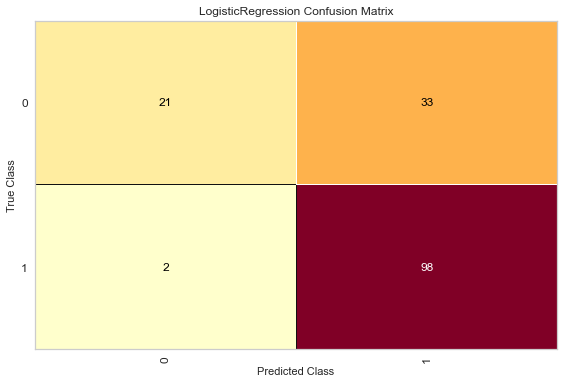

Confusion Matrix of LogisticRegression(random_state=0): ConfusionMatrix(ax=<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x000001F07C271B20>,
                estimator=LogisticRegression(random_state=0))
Recall score for LogisticRegression(random_state=0) is 0.98
Precision score for LogisticRegression(random_state=0) is 0.7480916030534351
F1 score for LogisticRegression(random_state=0) is 0.8484848484848484


In [71]:
# 4. Logistic Regression

lg = LogisticRegression(random_state=0)
fit_and_evaluate_model(lg,  X_train, X_test, y_train, y_test)

Accuracy of AdaBoostClassifier(random_state=0) is 75.97402597402598.


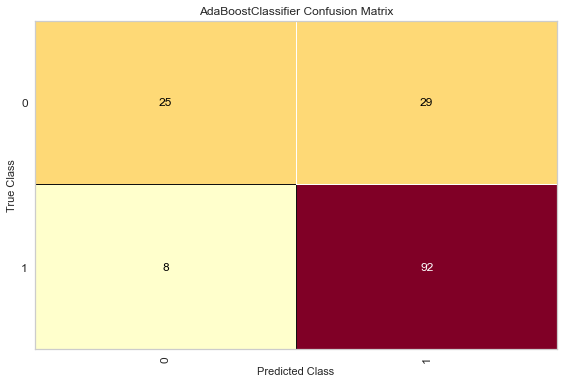

Confusion Matrix of AdaBoostClassifier(random_state=0): ConfusionMatrix(ax=<AxesSubplot:title={'center':'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x000002BB16B13040>,
                estimator=AdaBoostClassifier(random_state=0))
Recall score for AdaBoostClassifier(random_state=0) is 0.92
Precision score for AdaBoostClassifier(random_state=0) is 0.7603305785123967
F1 score for AdaBoostClassifier(random_state=0) is 0.832579185520362
F0.5 score for AdaBoostClassifier(random_state=0) is 0.7876712328767125


In [61]:
# 5. Ada Boosting Classifier

Abc = AdaBoostClassifier(random_state=0)
fit_and_evaluate_model(Abc, X_train, X_test, y_train, y_test)

**NOTE :** We got good accuracies with 3 models i.e. Random Forest, Logistic Regression and Ada Boosting classifier. So we will do hyperparameter tuning of those models. 

## Hyperparameter Tuning

**on Random Forest by using GridSearchCV**

In [72]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500]}

# Create a  model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [73]:
%%time

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Wall time: 44.6 s


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 500]},
             verbose=2)

In [75]:
 grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 100}

In [83]:
grid_search.best_score_

0.8217044393514982

**On Logistic Regression by GridSearchCV**

In [79]:
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],}

logreg = LogisticRegression()
grid_search1 = GridSearchCV(estimator= logreg, param_grid = parameters, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [80]:
%%time

grid_search1.fit(X_train, y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits
Wall time: 3.19 s


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=2)

In [81]:
grid_search1.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [82]:
grid_search1.best_score_

0.8217044393514982

**On Ada Boost Classifier by using GridSearchCV**

In [88]:
parameters = { 'n_estimators' : [10, 50, 100, 500],
              'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0]}

abc = AdaBoostClassifier()
grid_search2 = GridSearchCV(estimator= abc, param_grid= parameters, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [89]:
%%time

grid_search2.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Wall time: 5.28 s


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100, 500]},
             verbose=2)

In [90]:
grid_search2.best_params_

{'learning_rate': 0.0001, 'n_estimators': 10}

In [92]:
grid_search2.best_score_

0.8217044393514982

### We get same accuracy on All the 3 Models i.e. Random Forest,  Logistic Regression and Ada Boosting Classifier. So we will evaluate them further.

## Best model after hypertuning

**Ada Boosting Classifier**

Accuracy of AdaBoostClassifier(learning_rate=0.0001, n_estimators=10) is 77.27272727272727.


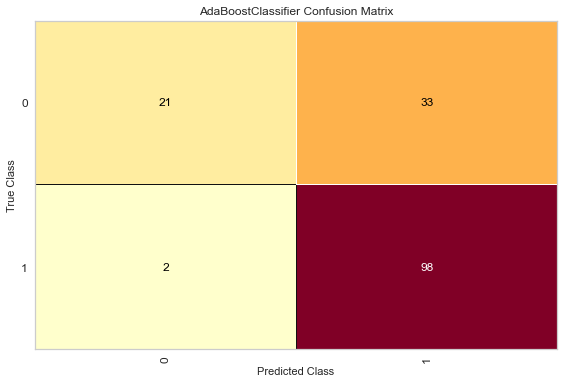

Confusion Matrix of AdaBoostClassifier(learning_rate=0.0001, n_estimators=10): ConfusionMatrix(ax=<AxesSubplot:title={'center':'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x000002BB166BE1F0>,
                estimator=AdaBoostClassifier(learning_rate=0.0001,
                                             n_estimators=10))
Recall score for AdaBoostClassifier(learning_rate=0.0001, n_estimators=10) is 0.98
Precision score for AdaBoostClassifier(learning_rate=0.0001, n_estimators=10) is 0.7480916030534351
F1 score for AdaBoostClassifier(learning_rate=0.0001, n_estimators=10) is 0.8484848484848484
F0.5 score for AdaBoostClassifier(learning_rate=0.0001, n_estimators=10) is 0.7852564102564102


In [62]:
abc_final = AdaBoostClassifier(learning_rate= 0.0001,
                               n_estimators= 10)

fit_and_evaluate_model(abc_final, X_train, X_test, y_train, y_test)

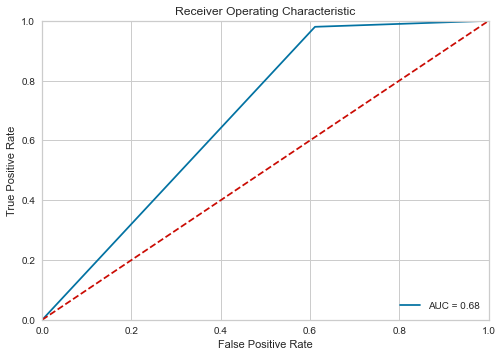

In [63]:
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = abc_final.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()